# Theoratical Generation of Data
- Strain Life (Morrow equation):
$$
\frac{\Delta \epsilon}{2} = \frac{\sigma'_f}{E}(2N_f)^b + \epsilon'_f(2N_f)^c
$$
- Reversal Stress Ratio:
$$
\frac{\Delta \sigma}{2} = \sigma_{max} = \sigma_f'(2N_f)^b 
$$
- SWT(Smith,Watson and Topper fatigue damage parameter):
$$
SWT = \sigma_{max}\frac{\Delta\epsilon}{2} = \frac{(\sigma_f'^2)(2N_f)^{2b}}{E} + \sigma_f'\epsilon_f'(2N_f)^{b+c}
$$
where,<br>
$\sigma^*_f$: fatigue strenght coefficient,<br>
$b$: fatigue strength exponent,<br>
$\epsilon^*_f$: fatigue ductility coefficient,<br>
$b$: fatigue ductility exponent and<br>
$E$: Young modulus<br>


The values of the constants for S355 Mild Steel are:

|$E\\ GPa$|$\sigma_f' \\ MPa$|$b$|$\epsilon_f'$|c|
|----|----|----|----|----|
|211.60|952.20|-0.0890|0.7371|-0.6640|

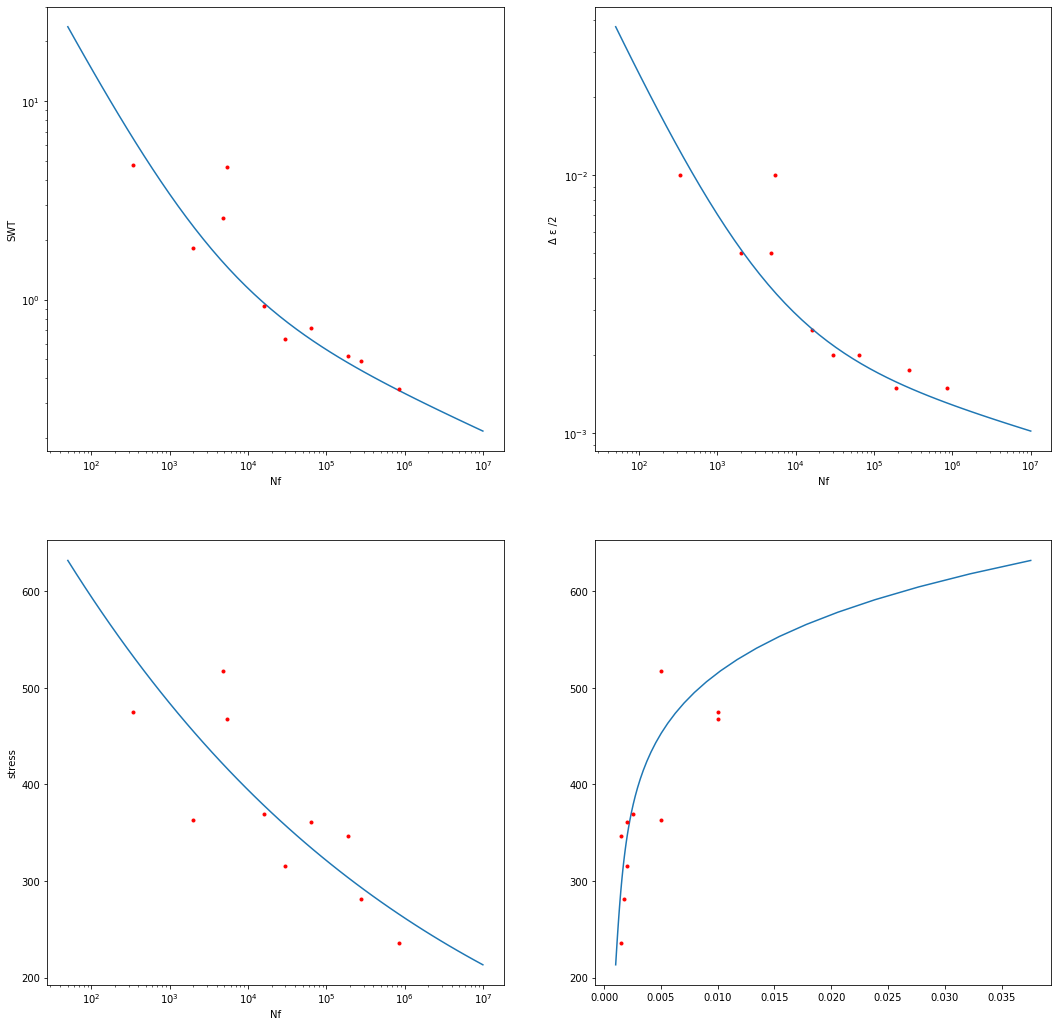

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(
        Nf=np.linspace(10,10000000,10000),
        E = 211600,
        sigma_dash = 952.20,
        b = -0.0890,
        epsilon_dash = 0.7371,
        c = -0.6640
    ):
    '''
        generate_data(Nf,E,sigma_dash,b,epsilon_dash,c)->
            SWT,strain,stress,Nf (default for S355)
    '''
    
    strain =  (sigma_dash/E)*((2*Nf)**b) + epsilon_dash*((2*Nf)**c)
    stress = sigma_dash*((2*Nf)**b)
    SWT = strain*stress
    return SWT,strain,stress,Nf

Nf = 10**np.linspace(1.7,7,50)

SWT,strain,stress,Nf = generate_data(Nf)

# Experimental Data

Exp_strain = np.array([1.00,0.50,2.00,0.40,0.30,0.35,0.30,0.40,1.00,2.00])*(5e-3)
Exp_stress = np.array([817.39,669.54,775.47,615.40,536.34,581.51,646.56,661.21,663.57,768.21])-300
Exp_Nf     = np.array([4805,16175,336,29501,861304,278243,191940,64244,2009,5420])

plt.figure(figsize=(18,18))

plt.subplot(2,2,1)

plt.ylabel('SWT')
plt.xlabel('Nf')
plt.xscale('log')
plt.yscale('log')

plt.plot(Nf,SWT,'-')
plt.plot(Exp_Nf,Exp_strain*Exp_stress,'r.')

plt.subplot(2,2,2)

plt.ylabel('\u0394 \u03B5 /2')
plt.xlabel('Nf')
plt.xscale('log')
plt.yscale('log')
plt.plot(Exp_Nf,Exp_strain,'r.')
plt.plot(Nf,strain,'-')

plt.subplot(2,2,3)

plt.ylabel('stress')
plt.xlabel('Nf')
plt.xscale('log')
plt.plot(Nf,stress)
plt.plot(Exp_Nf,Exp_stress,'r.')


plt.subplot(2,2,4)
plt.plot(strain,stress)
plt.plot(Exp_strain,Exp_stress,'r.')

# The Model
---
#### General information on Weibul Distribution
---
If $X$ is a random variable denoting the _time to failure_, the __Weibull distribution__ gives a distribution for which the _failure rate_ is proportional to a power of time.

$$
f_X(x) = 
\frac{\beta}{\delta}(\frac{x-\lambda}{\delta})^{\beta-1}e^{-(\frac{x-\lambda}{\delta})^\beta}
$$
$$
F_X(x;\lambda,\delta,\sigma) = 1-e^{-({\frac{x-\lambda}{\delta}})^\beta}
$$

where $\beta > 0$ is the __shape parameter__, 

$\delta > 0$ is the __scale parameter__,

$\lambda > x$ is the __location parameter__ (the minimum value of X).

Percentile points,

$$
x_p = \lambda + \delta(-log(1-p))^{\frac{1}{\beta}}
$$
where $0\leq p\leq 1$ 

__Important Properties of Weibull Distribution__

- Stable with respect to location and scale
$$
X \sim W(\lambda,\delta,\beta) \iff \frac{X-a}{b} \sim W(\frac{\lambda-a}{b},\frac{\delta}{b},\beta)
$$

- It is stable with respect to Minimum Operations.i.e., if $X_1,X_2,X_3,.....X_m$ are independent and identical distribution,then 
$$
X_i\sim W(\lambda,\delta,\beta) \iff min(X_1,X_2,....,X_m) \sim W(\lambda,\delta m^{\frac{1}{\beta}},\beta)
$$
if a set of independent and identical distribution is weibull then its minimum is also a Weibull Random Variable
---
#### Relevant Variable involved for modeling:
---
$P$:Probability of fatigue faliure<br>
$N$:Number of stress cycles to failure<br>
$N_0$:Threshold value of N (min lifetime)<br>
$SWT$:Smith,Watson and Topper fatigue damage parameter<br> 
$SWT_0$:Endurance limit<br>

Putting Related variables together we have three varaibles(based on II Theorem)<br>
$$
\frac{N}{N_0},\frac{SWT}{SWT_0},P \\
P = q(\frac{N}{N_0},\frac{SWT}{SWT_0})
$$
where $q()$ is a function we are to determine<br>
so P can be any monotone function of $\frac{N}{N_0},\frac{SWT}{SWT_0}$ , as $h(\frac{N}{N_0})$ $\&$ $g(\frac{SWT}{SWT_0})$

We denote them as 
$$
N^* = h(\frac{N}{N_0}) \\
SWT^* = g(\frac{SWT}{SWT_0})
$$

---
#### Justification of Weibull for S-N fields
---
Considerations:

- __Weakest Link__: Fatigue lifetime of a longitudinal element is the minimum of its constituting particles.Thus we need minimum model for a longitudinal element $L = ml$

- __Stability__: The distribution function must hold for different lengths.

- __Limit Behaviour__: Need Asymptotic family of Distribution

- __Limited Range__: $N^*$ & $SWT^*$ has finite lower bound,coincide with theoretical end of CDF
$$
N\geq N_0 \\
SWT \geq SWT_0 
$$
- __Compatibility__: $$E(N^*;SWT^*) = F(SWT^*;N^*)$$ i.e., Distribution of $N^*$ can be determined based on given $SWT^*$ and similarly $SWT^*$ from $N^*$.

___All these are Statisfied by Weibull Distribution___

$$E(N^*;SWT^*) = F(SWT^*;N^*)$$
becomes
$$
[\frac{SWT^*-\lambda(N^*)}{\delta(N^*)}] ^{\beta(N^*)} = [\frac{N^*-\lambda(SWT^*)}{\delta(SWT^*)}] ^{\beta(SWT^*)}
$$

Best fitted Solution:
$$
\lambda(N^*) = \frac{\lambda}{N^* - B} \\
\delta(N^*) = \frac{\delta}{N^* - B} \\
\beta(N^*) = \beta
$$
and


$$
\lambda(SWT^*) = \frac{\lambda}{SWT^* - C} \\
\delta(SWT^*) = \frac{\delta}{SWT^* - C} \\
\beta(SWT^*) = \beta
$$

results in,
$$
E[N^*;SWT^*] = F[SWT^*;N^*] \\ \\
= 1 - exp\lbrace -(\frac{(N^*-B)(SWT^*-C)-\lambda}{\delta})^{\beta}\}
$$

since $SWT^* \longrightarrow \infty$ a lower end for $N^* = h(\frac{N}{N_0)}) = h(1)$ must exists such that $B = h(1)$,<br>
similarly for $N^* \longrightarrow \infty$, $C = g(1)$

The percentile curve is constant.
$$
\frac{N^*SWT^*  - \lambda}{\delta} = constant
$$

- The Zero-percentile curve represents the minimum possible $N_f$ for different values of $SWT$ and is a hyperbola
As $log$ is used for $N_f$ and $SWT$ we choose,
$$
h(x)=g(x) = log(x)
$$

therefore,
$$
N^* = log(\frac{N}{N_0}) \\ SWT^* = log(\frac{SWT}{SWT_0}) \\
$$

$B = C = log(1) = 0$
$$E(N^*;SWT^*) = F(SWT^*;N^*) \\
= 1 - exp\{-(\frac{N^*SWT^*}{\delta})^{\beta} \} 
$$

$p$-curves
$$
log(\frac{SWT}{SWT^*}) = \frac{\lambda + \delta[-log(1-p)]^{\frac{1}{\beta}}}{log(\frac{N}{N_0})}
$$

Final Distribution
$$
N^*SWT^* \sim W(\lambda,\delta,\beta) \\
log(\frac{N}{N_0)})log(\frac{SWT}{SWT_0}) \sim W(\lambda,\delta,\beta) \\
log(\frac{N}{N_0)})\sim W(\frac{\lambda}{log(\frac{SWT}{SWT_0}) },\frac{\delta}{log(\frac{SWT}{SWT_0}) },\beta) \\
$$
----
The values for this model are:

|$logN_0$|$logSWT_0$|$\lambda$|$\delta$|$\beta$|
|----|----|----|----|----|
|-4.1079|-4.4317|53.8423|7.2698|3.6226|

|$logN_0$|$log\epsilon_{a0}$|$\lambda$|$\delta$|$\beta$|
|----|----|----|----|----|
|-3.2593|-9.1053|36.6676|5.8941|4.6952|



In [20]:
def getMoments(X):
    n = X.size
    M0 = (1/n)*(X.sum())
    
    sum1 = 0
    for i in range(n):
        sum1 += i*X[i]
    M1 = (1/((n)*(n-1)))*sum1
    
    sum2 = 0
    for i in range(n):
        sum2 += i*(i-1)*X[i]
    M2 = (1/(n*(n-1)*(n-2)))*sum2
    
    return M0,M1,M2

def f(x,C):
    return (2**x)*(C - 3) + (3**x) - (C-2)

def f_dash(x,C):
    return math.log(2)*(2**x)*(C - 3) - math.log(3)*(3**x)

def newton_approx(C,f,f_dash,x=-1,iteration=1000):
    for _  in range(iteration):
        x = x - (f(x,C)/f_dash(x,C))
        #print(x)
    return x

def getpara(M0,M1,M2,newt_init,newt_iterations):
    shape = -1/ newton_approx((3*M2 - M0)/(2*M1 - M0),f,f_dash,x = newt_init,iteration = newt_iterations)
    scale = (2*M1 - M0)/((1 - 2**(-(1/shape)))*math.gamma(1+(1/shape)))
    loc = M0 - scale*(math.gamma(1+(1/shape)))
    
    return loc,scale,shape

def PWM(X,newt_init=-0.1,newt_iterations = 100):
    return getpara(*getMoments(X),newt_init,newt_iterations)


predicted values: (58.31011426806585, 2.8096569546850514, 2.3081234998763445)
values in  paper: 62.8423 7.2698 3.6226
predicted values(p-Ea-Nf): (38.11514451850456, 3.869499492983117, 4.674779199693778)
values in  paper(p-Ea-Nf): 43.6676 5.8941 4.6952


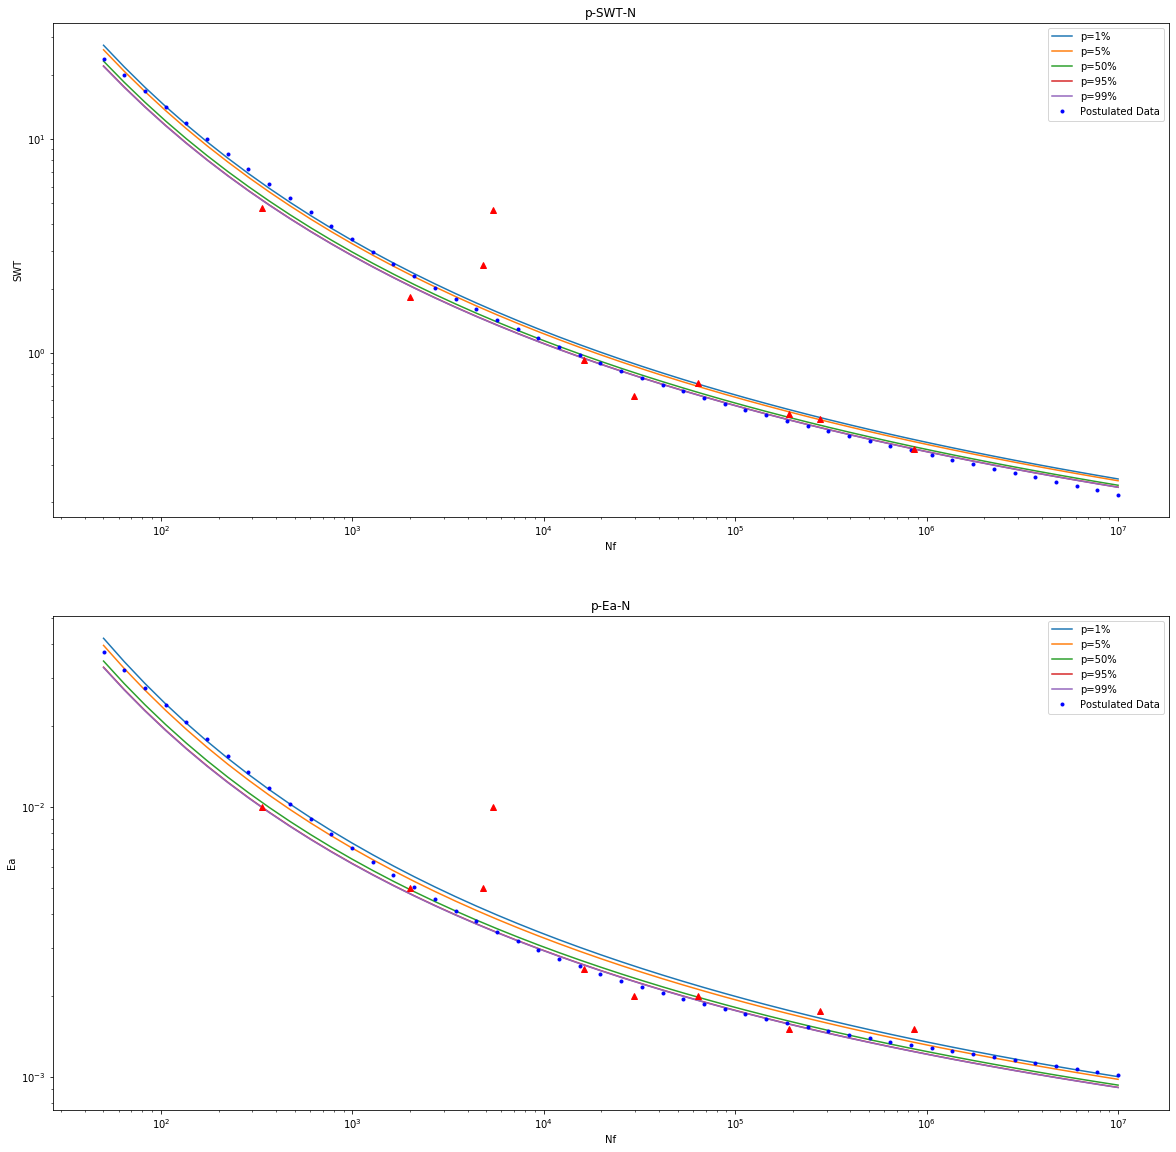

In [21]:
import math
class Weibull:
    '''
w = Weibull(shape:beta,scale:theta,position:lambda)

    '''
    def __init__(self,shape,scale,loc,x):
        self.shape = shape
        self.scale = scale
        self.loc = loc
        self.x = x
        _,self.bins  = np.histogram(self.x,100,density=True)


    def pdf(self):
        x = self.bins
        shape = self.shape
        scale = self.scale
        loc =  self.loc
        return ((shape/scale)*((x-loc)/scale)**(shape-1))*(np.exp(-((x-loc)/scale)**shape))

    def cdf(self):
        x = self.bins
        shape = self.shape
        scale = self.scale
        loc = self.loc
        return 1- np.exp(-((x-loc)/scale)**shape)

    def failure_rate(self):
        x = self.x
        shape = self.shape
        scale = self.scale
        return (shape/scale)*((x/scale)**(shape-1))

    def E_x(self):
        shape = self.shape
        scale = self.scale
        return np.real(scale*(gamma(1+1/shape)))

    def var_x(self):
        shape = self.shape
        scale = self.scale
        return (scale**2)*(gamma(1+(2/shape))-((gamma(1+(1/shape)))**2))

    def plot_pdf(self):
        plt.plot(self.bins,self.pdf())
    
    def plot_cdf(self):
        plt.plot(self.bins,self.cdf())

    def plot_fr(self):
        plt.plot(self.bins,self.failure_rate())
    
    def plot_hist(self):
        plt.hist(self.x)

    def get_xp(self,F_x):
        return  np.real(self.loc+(self.scale)*(-(math.log(1-F_x))**(1/self.shape)))
    
logSWT0 = -4.4317 
logN01 = -4.1079
loc1 = 53.8423+9
scale1 = 7.2698
shape1 = 3.6226
X1 = (np.log(Nf) - logN01)*(np.log(SWT) - logSWT0)

print('predicted values:',PWM(np.sort(X1)))
print('values in  paper:',loc1,scale1,shape1)
#loc1,scale1,shape1 = PWM(np.sort(X1))
w1 = Weibull(shape1,scale1,loc1,X1)

xp101 = w1.get_xp(0.001)
xp105 = w1.get_xp(0.005)
xp150 = w1.get_xp(0.050)
xp195 = w1.get_xp(0.095)
xp199 = w1.get_xp(0.099)

pSWT01 = np.exp(logSWT0 + (xp101/(np.log(Nf)-logN01)))
pSWT05 = np.exp(logSWT0 + (xp105/(np.log(Nf)-logN01)))
pSWT50 = np.exp(logSWT0 + (xp150/(np.log(Nf)-logN01)))
pSWT95 = np.exp(logSWT0 + (xp195/(np.log(Nf)-logN01)))
pSWT99 = np.exp(logSWT0 + (xp199/(np.log(Nf)-logN01)))


plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.title("p-SWT-N")
plt.xlabel("Nf")
plt.ylabel("SWT")
plt.xscale('log')
plt.yscale('log')

# percentile curves
plt.plot(Nf,pSWT01,label="p=1%")
plt.plot(Nf,pSWT05,label="p=5%")
plt.plot(Nf,pSWT50,label="p=50%")
plt.plot(Nf,pSWT95,label="p=95%")
plt.plot(Nf,pSWT99,label="p=99%")
# theoretical data
plt.plot(Nf,SWT,'b.',label="Postulated Data")

# Experimental Data
plt.plot(Exp_Nf,Exp_strain*Exp_stress,'r^')

plt.legend()
# plt.savefig("images/p_s_n_model.png")
# Strain p-E_a-N

logEa0 = -9.1053
logN02 = -3.2593	
loc2 = 36.6676+7
scale2 = 5.8941
shape2 = 4.6952
X2 = (np.log(Nf) - logN02)*(np.log(strain) - logEa0)

print('predicted values(p-Ea-Nf):',PWM(np.sort(X2)))
print('values in  paper(p-Ea-Nf):',loc2,scale2,shape2)
w2 = Weibull(shape2,scale2,loc2,X2)

xp201 = w2.get_xp(0.001)
xp205 = w2.get_xp(0.005)
xp250 = w2.get_xp(0.050)
xp295 = w2.get_xp(0.095)
xp299 = w2.get_xp(0.099)

pEa01 = np.exp(logEa0 + (xp201/(np.log(Nf)-logN02)))
pEa05 = np.exp(logEa0 + (xp205/(np.log(Nf)-logN02)))
pEa50 = np.exp(logEa0 + (xp250/(np.log(Nf)-logN02)))
pEa95 = np.exp(logEa0 + (xp295/(np.log(Nf)-logN02)))
pEa99 = np.exp(logEa0 + (xp299/(np.log(Nf)-logN02)))

plt.subplot(3,1,3)
plt.title("p-Ea-N")
plt.xlabel("Nf")
plt.ylabel("Ea")
plt.xscale('log')
plt.yscale('log')

# percentile curves
plt.plot(Nf,pEa01,label="p=1%")
plt.plot(Nf,pEa05,label="p=5%")
plt.plot(Nf,pEa50,label="p=50%")
plt.plot(Nf,pEa95,label="p=95%")
plt.plot(Nf,pEa99,label="p=99%")
# theoretical data
plt.plot(Nf,strain,'b.',label="Postulated Data")
# Experimental Data
plt.plot(Exp_Nf,Exp_strain,'r^')

plt.legend()
plt.savefig("images/model.png")

### p-Nf given SWT
$$
N^*SWT^* \sim W(\lambda,\delta,\beta) \\
log(\frac{N}{N_0)})log(\frac{SWT}{SWT_0}) \sim W(\lambda,\delta,\beta) \\
log(\frac{N}{N_0)})\sim W(\frac{\lambda}{log(\frac{SWT}{SWT_0}) },\frac{\delta}{log(\frac{SWT}{SWT_0}) },\beta) \\
log(\frac{N}{N_0)}) = x_p \\
log(N_f) = x_p + log(N_0) \\
N_f = e^{x_p + log(N_0) }
$$

## Determining the fatigue crack propogation curves 

$$
\frac{\rho^*}{N_f}=\frac{da}{dN} = C\Delta K^m
$$
$\rho^* = 5.5\mu m$
- Determining $p$-$\frac{da}{dN}$-$\Delta K$ curves:
$$
log(\frac{N}{N_0)})\sim W(\frac{\lambda}{log(\frac{SWT}{SWT_0}) },\frac{\delta}{log(\frac{SWT}{SWT_0}) },\beta) \\
$$

#### Generating Crack Propogation value:

|     |  $C$           |  $m$  |
|-----|----------------|-------|
|R=0.0|$7.195x10^{-15}$|3.499|
|R=0.5|$6.281x10^{-15}$|3.555|
|R=0.7|$2.037x10^{-13}$|3.003|


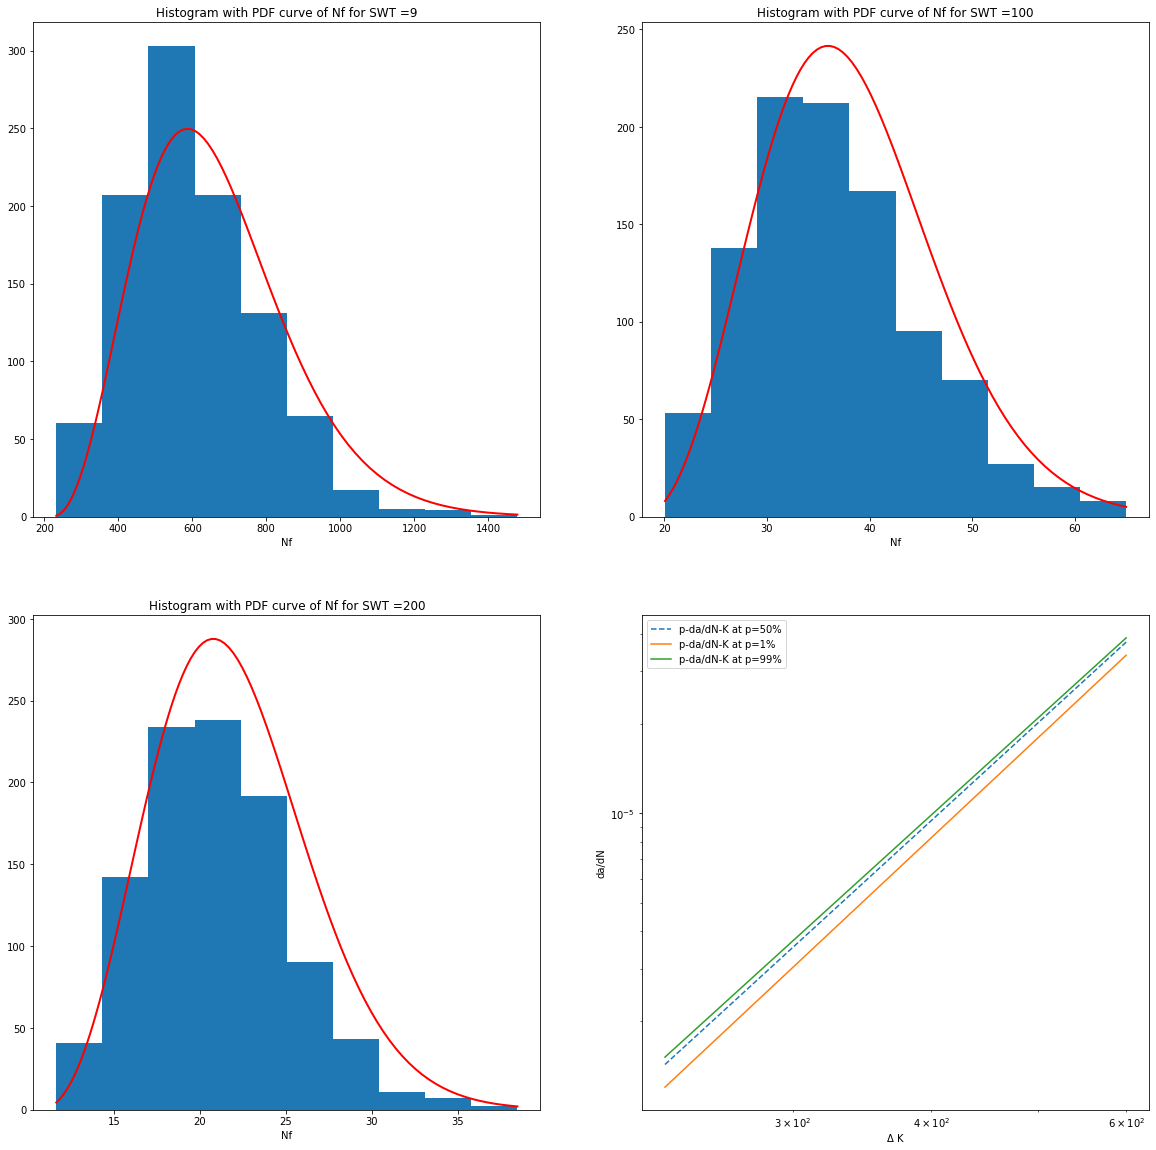

In [37]:
import math

# coping values of p-SWT-N curve

# determing p-Nf for a particular SWT
# say SWT = 9
def plt_pNf(SWT):
    logSWT0 = -4.4317 
    lgSWT_SWT0 = math.log(SWT) - logSWT0

    logN01 = -4.1079
    loc3 = (53.8423+9)/lgSWT_SWT0
    scale3 = (7.2698)/lgSWT_SWT0
    shape1 = 3.6226
    #print(loc3,scale3,shape1)
    # X3 Weibull random variable (Nf) given SWT = 9 
    X3 = (np.random.weibull(shape1,1000)*scale3) + loc3
    _,bins  = np.histogram(X3,100,density=True)
    pdf = ((shape1/scale3)*((bins-loc3)/scale3)**(shape1-1))*(np.exp(-((bins-loc3)/scale3)**shape1))

    plt.xlabel("Nf")
    plt.title("Histogram with PDF curve of Nf for SWT ="+str(SWT))
    h,_,_ = plt.hist(np.exp(X3+logN01),label='histograph')
    plt.plot(np.exp(bins+logN01),pdf*(h.max()*(0.65)),'r-',label='PDF',linewidth="2")
    
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt_pNf(9)

plt.subplot(2,2,2)
plt_pNf(100)

plt.subplot(2,2,3)
plt_pNf(200)

# Crack propogation data
logN01 = -4.1079

C0 = 7.195e-15
m0 = 3.499

delta_k = np.linspace(250,600,50)

da_dN0 = C0*(delta_k**m0)

plt.subplot(2,2,4)
plt.ylabel('da/dN')
plt.yscale('log')
plt.xlabel('\u0394 K')
plt.xscale('log')

#plt.plot(delta_k,da_dN0,'r.',label='Theoratical data')
#plt.title('Fatigue crack propagation data of S355 steel for distinct stress ratios')

# percentile crack propogation

SWT_a = 30

lgSWT_SWT0_a = math.log(SWT_a) - logSWT0

logSWT0 = -4.4317 
shape1 = 3.6226
logN01 = -4.1079

loc3_a = (53.8423+9)/lgSWT_SWT0_a
scale3_a = (7.2698)/lgSWT_SWT0_a


def get_xp_Nf_a(p,loc=loc3_a,shape=shape1,scale=scale3_a):
    return np.real(loc+(scale)*(-(math.log(1-p))**(1/shape)))

SWT_b = 9000
points = [230,600]
lgSWT_SWT0_b = math.log(SWT_b) - logSWT0

logSWT0 = -4.4317 
shape1 = 3.6226
logN01 = -4.1079

loc3_b = (53.8423+9)/lgSWT_SWT0_b
scale3_b = (7.2698)/lgSWT_SWT0_b


def get_xp_Nf_b(p,loc=loc3_b,shape=shape1,scale=scale3_b):
    return np.real(loc+(scale)*(-(math.log(1-p))**(1/shape)))



Nf01_a = np.exp(get_xp_Nf_a(0.001) + logN01)
Nf01_b = np.exp(get_xp_Nf_b(0.001) + logN01)

Nf05_a = np.exp(get_xp_Nf_a(0.005) + logN01)
Nf05_b = np.exp(get_xp_Nf_b(0.005) + logN01)

Nf50_a = np.exp(get_xp_Nf_a(0.050) + logN01)
Nf50_b = np.exp(get_xp_Nf_b(0.050) + logN01)

Nf95_a = np.exp(get_xp_Nf_a(0.095) + logN01)
Nf95_b = np.exp(get_xp_Nf_b(0.095) + logN01)

Nf99_a = np.exp(get_xp_Nf_a(0.099) + logN01)
Nf99_b = np.exp(get_xp_Nf_b(0.099) + logN01)

rho = 5.5e-5

plt.plot(points,[rho/Nf50_a,rho/Nf50_b],'--',label="p-da/dN-K at p=50%")
plt.plot(points,[rho/Nf01_a,rho/Nf01_b],label="p-da/dN-K at p=1%")
plt.plot(points,[rho/Nf99_a,rho/Nf99_b],label="p-da/dN-K at p=99%")

plt.legend()